<a href="https://colab.research.google.com/github/akhils-codes1/Dissertation/blob/main/umap_and_tsne_and_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/TrainingData_sub.csv")
df.head()

,Unnamed: 0,Text,class
0,0,18910b728cb8d8c14d5afb5db67d69720f9418066dd329...,3
1,1,e63d1b4a9d2855373816521068644a52f4c943b4ab3e5e...,2
2,2,9b6c9f22a13f64deb54bfbb4b0cbaad52a5b1615a9be5b...,0
3,3,3a235a110d29555b22314731894c452a1d8bcd7ceb1bef...,2
4,4,0485b26ea29ae0d5f2b096ccd659c606867a5ec1f0dbdc...,2


In [4]:
df = df.drop('Unnamed: 0', axis=1)
df

,Text,class
0,18910b728cb8d8c14d5afb5db67d69720f9418066dd329...,3
1,e63d1b4a9d2855373816521068644a52f4c943b4ab3e5e...,2
2,9b6c9f22a13f64deb54bfbb4b0cbaad52a5b1615a9be5b...,0
3,3a235a110d29555b22314731894c452a1d8bcd7ceb1bef...,2
4,0485b26ea29ae0d5f2b096ccd659c606867a5ec1f0dbdc...,2
...,...,...
19995,bbeda2d90e33961f551612f81aa7dd85524617e3240fcd...,3
19996,406f14f9972474a0c658cca497482e8b57bcc56f0a4e7f...,2
19997,76d006d1227dcd28f4bdb52c4f5ac9d1ff05bb45faebf6...,3
19998,339b2a2e97cc69f844274c6349da06c987a99220c404f3...,3


In [5]:
df['class'].value_counts()

3    5000
2    5000
0    5000
1    5000
Name: class, dtype: int64

In [6]:
import numpy as np
fdf = np.zeros((20000, 7001))

In [7]:
fdf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
for i in range(20000):
  temp = df['Text'][i]
  temp = np.array(list(bin(int(temp, base=16))[2:])).astype('int8')
  fdf[i,:7000] = temp[:7000]
  fdf[i,7000] = df['class'][i]

In [9]:
df['class'].value_counts()

3    5000
2    5000
0    5000
1    5000
Name: class, dtype: int64

In [10]:
fdf

array([[1., 1., 0., ..., 1., 0., 3.],
       [1., 1., 1., ..., 0., 1., 2.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 3.],
       [1., 1., 0., ..., 0., 1., 3.],
       [1., 0., 1., ..., 1., 1., 2.]])

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
fdf_scaled = StandardScaler().fit_transform(fdf[:,:7000])
fdf_scaled

array([[ 0.        ,  0.99113925, -0.981668  , ...,  1.00280393,
         1.00290422, -1.00020002],
       [ 0.        ,  0.99113925,  1.01867434, ..., -0.99720391,
        -0.99710419,  0.99980002],
       [ 0.        , -1.00893996, -0.981668  , ..., -0.99720391,
         1.00290422, -1.00020002],
       ...,
       [ 0.        ,  0.99113925,  1.01867434, ...,  1.00280393,
        -0.99710419, -1.00020002],
       [ 0.        ,  0.99113925, -0.981668  , ..., -0.99720391,
        -0.99710419,  0.99980002],
       [ 0.        , -1.00893996,  1.01867434, ...,  1.00280393,
         1.00290422,  0.99980002]])

In [13]:
# np.save('/content/drive/MyDrive/fdf_scaled.npy', fdf_scaled)

In [14]:

# import numpy as np
# fdf_scaled = np.load('/content/drive/MyDrive/fdf_scaled.npy')
# fdf_scaled

In [15]:
!pip3 uninstall umap
!pip3 install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=31e4340ae9548e55eb1c1d9b1f2a1d4696c1648b7cdd587fc6b82f26bf8742a7
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=25e99c3fa36d0f45b733e5b3d2a2441b68509a795629b410414267ca2e0f1912
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


In [16]:
import umap.umap_ as umap
reducer = umap.UMAP()

In [17]:
fdf_scaled = reducer.fit_transform(fdf_scaled)
fdf_scaled

array([[8.98126  , 6.5837836],
       [9.162939 , 3.5491688],
       [9.677938 , 7.1860676],
       ...,
       [8.598703 , 4.9943566],
       [7.517553 , 5.6427355],
       [8.430372 , 5.6922007]], dtype=float32)

In [19]:
fdf[:,-1], len(fdf[:, -1])

(array([3., 2., 0., ..., 3., 3., 2.]), 20000)

In [25]:
fdf_scaled[:10]

array([[8.98126  , 6.5837836],
       [9.162939 , 3.5491688],
       [9.677938 , 7.1860676],
       [8.801921 , 4.1507254],
       [7.585017 , 5.5908246],
       [9.75705  , 3.7657812],
       [7.4562073, 3.1755483],
       [8.895743 , 3.6806173],
       [8.435468 , 3.7337184],
       [7.626716 , 4.3666215]], dtype=float32)

In [26]:
X_train, X_valid, X_test, y_train, y_valid, y_test = fdf_scaled[ :15000], fdf_scaled[15000:17500], fdf_scaled[17500:20000], fdf[:,-1][:15000], fdf[:, -1][15000:17500], fdf[:,-1][17500:20000]

In [27]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((15000, 2), (2500, 2), (2500, 2), (15000,), (2500,), (2500,))

In [31]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
    ])

In [32]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [33]:
model.fit(X_train, y_train, epochs = 25, validation_data = (X_valid, y_valid))

Epoch 1/25
469/469 [==============================] - 3s 5ms/step - loss: 1.3945 - sparse_categorical_accuracy: 0.2472 - val_loss: 1.3878 - val_sparse_categorical_accuracy: 0.2480
Epoch 2/25
469/469 [==============================] - 2s 3ms/step - loss: 1.3884 - sparse_categorical_accuracy: 0.2501 - val_loss: 1.3893 - val_sparse_categorical_accuracy: 0.2456
Epoch 3/25
469/469 [==============================] - 2s 4ms/step - loss: 1.3881 - sparse_categorical_accuracy: 0.2498 - val_loss: 1.3867 - val_sparse_categorical_accuracy: 0.2496
Epoch 4/25
469/469 [==============================] - 3s 7ms/step - loss: 1.3868 - sparse_categorical_accuracy: 0.2514 - val_loss: 1.3893 - val_sparse_categorical_accuracy: 0.2468
Epoch 5/25
469/469 [==============================] - 2s 4ms/step - loss: 1.3875 - sparse_categorical_accuracy: 0.2440 - val_loss: 1.3884 - val_sparse_categorical_accuracy: 0.2452
Epoch 6/25
469/469 [==============================] - 2s 5ms/step - loss: 1.3872 - sparse_categorica

In [56]:
model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 2ms/step - loss: 1.3869 - sparse_categorical_accuracy: 0.2484


[1.3868707418441772, 0.2484000027179718]

In [ ]:
y_pred = model.predict(X_test)
y_pred = [i.argmax() for i in y_pred]

In [37]:
y_test

array([1., 3., 2., ..., 3., 3., 2.])

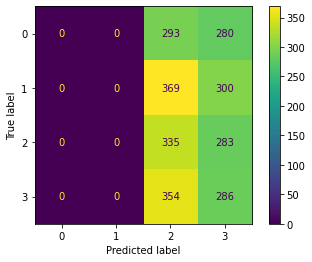

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

In [46]:
fdf_scaled = pd.DataFrame(fdf_scaled)

In [47]:
classes = pd.DataFrame(df['class'].to_numpy(), columns = ['class'])
classes

,class
0,3
1,2
2,0
3,2
4,2
...,...
19995,3
19996,2
19997,3
19998,3


In [48]:
fdf_scaled = pd.concat([fdf_scaled, classes], axis=1)
fdf_scaled

,0,1,class
0,8.981260,6.583784,3
1,9.162939,3.549169,2
2,9.677938,7.186068,0
3,8.801921,4.150725,2
4,7.585017,5.590825,2
...,...,...,...
19995,7.878569,6.455353,3
19996,7.129986,4.531925,2
19997,8.598703,4.994357,3
19998,7.517553,5.642735,3


In [49]:
fdf_scaled.columns = ['c1', 'c2', 'class']

In [50]:
fdf_scaled.head()

,c1,c2,class
0,8.981260,6.583784,3
1,9.162939,3.549169,2
2,9.677938,7.186068,0
3,8.801921,4.150725,2
4,7.585017,5.590825,2


In [51]:
import seaborn as sns
from matplotlib import pyplot as plt

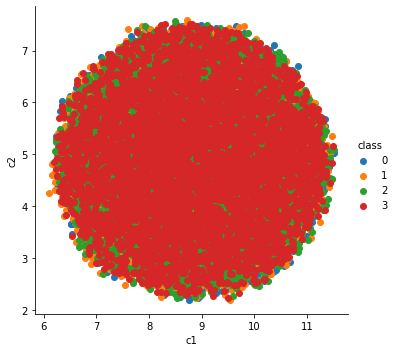

In [52]:
sns.FacetGrid(fdf_scaled, hue='class', height=5).map(plt.scatter, 'c1','c2').add_legend()
plt.show()

In [53]:
from sklearn.manifold import TSNE
tsne = TSNE()

In [54]:
fdf_scaled = StandardScaler().fit_transform(fdf[:, :7000])
fdf_scaled

array([[ 0.        ,  0.99113925, -0.981668  , ...,  1.00280393,
         1.00290422, -1.00020002],
       [ 0.        ,  0.99113925,  1.01867434, ..., -0.99720391,
        -0.99710419,  0.99980002],
       [ 0.        , -1.00893996, -0.981668  , ..., -0.99720391,
         1.00290422, -1.00020002],
       ...,
       [ 0.        ,  0.99113925,  1.01867434, ...,  1.00280393,
        -0.99710419, -1.00020002],
       [ 0.        ,  0.99113925, -0.981668  , ..., -0.99720391,
        -0.99710419,  0.99980002],
       [ 0.        , -1.00893996,  1.01867434, ...,  1.00280393,
         1.00290422,  0.99980002]])

In [55]:
fdf_scaled = tsne.fit_transform(fdf_scaled)

In [57]:
X_train, X_valid, X_test, y_train, y_valid, y_test = fdf_scaled[ :15000], fdf_scaled[15000:17500], fdf_scaled[17500:20000], fdf[:,-1][:15000], fdf[:, -1][15000:17500], fdf[:,-1][17500:20000]

In [58]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((15000, 2), (2500, 2), (2500, 2), (15000,), (2500,), (2500,))

In [59]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
    ])

In [60]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [61]:
model.fit(X_train, y_train, epochs = 25, validation_data = (X_valid, y_valid))

Epoch 1/25
469/469 [==============================] - 2s 3ms/step - loss: 1.4668 - sparse_categorical_accuracy: 0.2523 - val_loss: 1.4115 - val_sparse_categorical_accuracy: 0.2556
Epoch 2/25
469/469 [==============================] - 1s 2ms/step - loss: 1.3931 - sparse_categorical_accuracy: 0.2509 - val_loss: 1.3887 - val_sparse_categorical_accuracy: 0.2436
Epoch 3/25
469/469 [==============================] - 1s 2ms/step - loss: 1.3893 - sparse_categorical_accuracy: 0.2527 - val_loss: 1.3881 - val_sparse_categorical_accuracy: 0.2564
Epoch 4/25
469/469 [==============================] - 1s 2ms/step - loss: 1.3872 - sparse_categorical_accuracy: 0.2487 - val_loss: 1.3861 - val_sparse_categorical_accuracy: 0.2596
Epoch 5/25
469/469 [==============================] - 1s 2ms/step - loss: 1.3866 - sparse_categorical_accuracy: 0.2548 - val_loss: 1.3864 - val_sparse_categorical_accuracy: 0.2508
Epoch 6/25
469/469 [==============================] - 1s 2ms/step - loss: 1.3865 - sparse_categorica

In [62]:
y_pred = model.predict(X_test)
y_pred = [i.argmax() for i in y_pred]

79/79 [==============================] - 0s 1ms/step


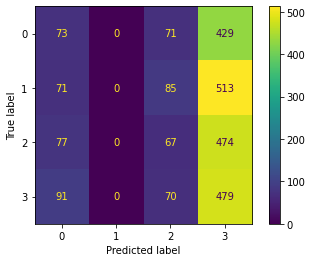

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

In [64]:
model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 3ms/step - loss: 1.3875 - sparse_categorical_accuracy: 0.2476


[1.387487530708313, 0.2476000040769577]

In [65]:
fdf_scaled.shape

(20000, 2)

In [66]:
fdf_scaled = pd.DataFrame(fdf_scaled)

In [67]:
classes

,class
0,3
1,2
2,0
3,2
4,2
...,...
19995,3
19996,2
19997,3
19998,3


In [68]:
fdf_scaled = pd.concat([fdf_scaled, classes], axis=1)
fdf_scaled

,0,1,class
0,10.938133,3.476121,3
1,-7.839388,-78.983391,2
2,-20.404682,22.579937,0
3,-44.935352,43.305061,2
4,53.350433,30.930267,2
...,...,...,...
19995,-43.743347,-3.814493,3
19996,-30.262192,-4.716323,2
19997,33.524544,-59.891911,3
19998,55.108780,-30.998848,3


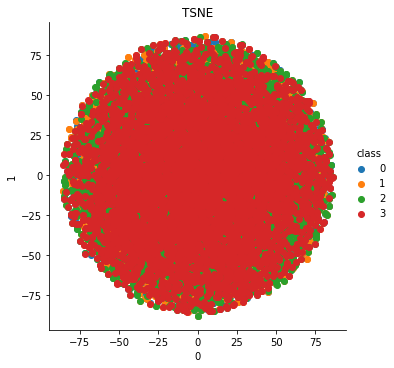

In [69]:
sns.FacetGrid(fdf_scaled, hue='class', height=5).map(plt.scatter, 0,1).add_legend()
plt.title('TSNE')
plt.show()